In [17]:
%matplotlib inline

import re
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def process_log(log):
    "Process lines of the log and return a [id, latency] row for every valid data point"
    for line in log:
        id = re.findall('icmp_seq.(\d+)', line)
        if id:
            if 'timeout' in line:
                yield [int(id[0]), 0, True]
            else:
                latency = re.findall('time=(\d+\.\d+)', line)
                if latency:
                    yield [int(id[0]), float(latency[0]), False]
        

In [5]:
pings = None
with open("ping.log") as log:
    pings = pd.DataFrame(list(process_log(log)), columns=['seq', 'latency', 'timeout'])
    

In [6]:
latency_p999 = pings.latency.quantile(.999)
pings_p999 = pings[pings.latency < latency_p999]

/opt/twitter/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115901f60>]], dtype=object)

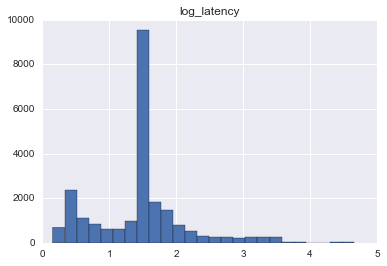

In [24]:
non_timeout = pings_p999[pings_p999.timeout != True]
non_timeout['log_latency'] = non_timeout.latency.apply(lambda l: math.log(l))
pd.DataFrame.hist(non_timeout, column='log_latency', bins=25)

count    24045.000000
mean         5.526389
std          6.611455
min          0.000000
25%          2.690000
50%          4.323000
75%          5.168000
max        104.912000
Name: latency, dtype: float64